In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [253]:
df = pd.read_excel('RTY as of Oct 25 20241_rrmkcreo.xlsx', engine='openpyxl')
df.head()

,Ticker,Name,Weight,Shares,Price,BEst PEG Ratio:Y\n,Market Cap LF\n,P/B 5Yr Avg LF\n,P/S 5Yr Avg LF\n,Rev Gr Adj 5Y CAGR LF\n,P/CF 5Yr Avg LF\n,BV - 5 Yr Geo Gr LF\n,CF/Sh - 5 Yr Geo Gr LF\n,Basic EPS - 5 Year Average Growth LF\n,BEst Est LTG EPS\n,Dvd Ind Yld\n,BEst P/E BF12M\n
0,TGTX UR Equity,TG Therapeutics Inc,--,--,23.480,1.219984,2754470912,29.274418,35.469791,354.21405,--,51.98077,--,--,183.01,--,33.822326
1,AXNX UW Equity,Axonics Inc,--,--,70.140,3.109805,3429709056,4.959128,8.200708,138.390976,--,25.707512,--,--,175.53,--,109.80486
2,WGS UW Equity,GeneDx Holdings Corp,--,--,60.250,--,703855680,1.196106,0.803663,--,--,--,--,--,148.00,--,--
3,ULCC UW Equity,Frontier Group Holdings Inc,--,--,6.985,--,1106645376,2.805808,0.402562,8.841541,--,--,--,54.347534,126.26,--,15.980725
4,RELY UW Equity,Remitly Global Inc,--,--,14.640,2.77041,3659426304,--,--,--,--,--,--,--,98.00,--,59.219034


In [254]:
df.shape

(1972, 17)

In [255]:
df = df.replace('--', np.nan)
df.fillna(df.median(),inplace=True)

C:\Users\ikego\AppData\Local\Temp\ipykernel_6452\3518393319.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.median(),inplace=True)


In [256]:
df.head()

,Ticker,Name,Weight,Shares,Price,BEst PEG Ratio:Y\n,Market Cap LF\n,P/B 5Yr Avg LF\n,P/S 5Yr Avg LF\n,Rev Gr Adj 5Y CAGR LF\n,P/CF 5Yr Avg LF\n,BV - 5 Yr Geo Gr LF\n,CF/Sh - 5 Yr Geo Gr LF\n,Basic EPS - 5 Year Average Growth LF\n,BEst Est LTG EPS\n,Dvd Ind Yld\n,BEst P/E BF12M\n
0,TGTX UR Equity,TG Therapeutics Inc,NaN,NaN,23.480,1.219984,2.754471e+09,29.274418,35.469791,354.214050,9.402755,51.980770,5.339077,11.328490,183.01,2.786486,33.822326
1,AXNX UW Equity,Axonics Inc,NaN,NaN,70.140,3.109805,3.429709e+09,4.959128,8.200708,138.390976,9.402755,25.707512,5.339077,11.328490,175.53,2.786486,109.804860
2,WGS UW Equity,GeneDx Holdings Corp,NaN,NaN,60.250,1.501337,7.038557e+08,1.196106,0.803663,6.413981,9.402755,4.885082,5.339077,11.328490,148.00,2.786486,14.951520
3,ULCC UW Equity,Frontier Group Holdings Inc,NaN,NaN,6.985,1.501337,1.106645e+09,2.805808,0.402562,8.841541,9.402755,4.885082,5.339077,54.347534,126.26,2.786486,15.980725
4,RELY UW Equity,Remitly Global Inc,NaN,NaN,14.640,2.770410,3.659426e+09,1.799058,1.667241,6.413981,9.402755,4.885082,5.339077,11.328490,98.00,2.786486,59.219034


In [257]:
df.describe()

,Weight,Shares,Price,BEst PEG Ratio:Y\n,Market Cap LF\n,P/B 5Yr Avg LF\n,P/S 5Yr Avg LF\n,Rev Gr Adj 5Y CAGR LF\n,P/CF 5Yr Avg LF\n,BV - 5 Yr Geo Gr LF\n,CF/Sh - 5 Yr Geo Gr LF\n,Basic EPS - 5 Year Average Growth LF\n,BEst Est LTG EPS\n,Dvd Ind Yld\n,BEst P/E BF12M\n
count,0.0,0.0,1972.000000,1972.000000,1.972000e+03,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000
mean,NaN,NaN,34.325246,1.939595,1.543174e+09,3.222878,31.739085,9.643783,16.074598,4.997912,6.666194,15.527574,4.405968,3.141757,28.364633
std,NaN,NaN,48.733793,9.926148,1.686400e+09,8.415778,559.860516,28.025908,108.350624,18.171221,16.890159,149.869552,14.515570,5.061731,163.194413
min,NaN,NaN,0.115500,-121.067371,1.811160e+07,0.279001,0.028581,-100.000000,0.174408,-100.000000,-100.000000,-2017.131592,-117.420000,0.047020,1.580411
25%,NaN,NaN,7.995000,1.501337,3.915286e+08,1.213331,0.922655,4.324611,8.164119,1.734294,5.339077,11.328490,0.000000,2.786486,12.236441
50%,NaN,NaN,18.305000,1.501337,9.217634e+08,1.799058,1.667241,6.413981,9.402755,4.885082,5.339077,11.328490,0.000000,2.786486,14.951520
75%,NaN,NaN,40.077500,1.501337,2.136014e+09,2.829447,2.735392,8.806523,10.944803,8.094413,5.339077,11.328490,0.000000,2.786486,18.423157
max,NaN,NaN,778.280000,266.081895,2.145804e+10,265.950867,23254.423828,427.076691,4598.741699,334.566162,215.143387,4677.399902,183.010000,212.201599,4966.027842


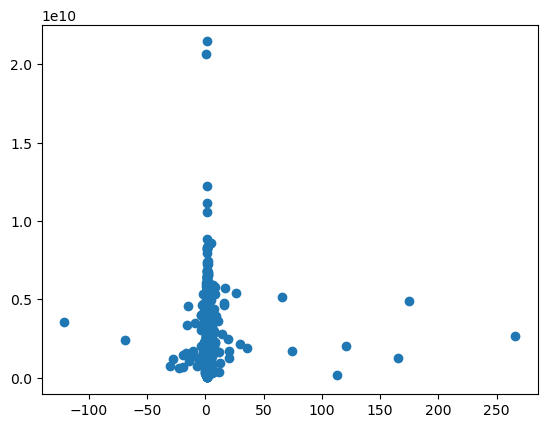

In [294]:
plt.scatter(df['BEst PEG Ratio:Y\n'],df['Market Cap LF\n'])

In [258]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_standardized = df.copy()  # Make a copy to keep the original data
df_standardized[['BEst PEG Ratio:Y\n', 'Market Cap LF\n']] = scaler.fit_transform(df[['BEst PEG Ratio:Y\n', 'Market Cap LF\n']])

In [259]:
df_standardized.head()

,Ticker,Name,Weight,Shares,Price,BEst PEG Ratio:Y\n,Market Cap LF\n,P/B 5Yr Avg LF\n,P/S 5Yr Avg LF\n,Rev Gr Adj 5Y CAGR LF\n,P/CF 5Yr Avg LF\n,BV - 5 Yr Geo Gr LF\n,CF/Sh - 5 Yr Geo Gr LF\n,Basic EPS - 5 Year Average Growth LF\n,BEst Est LTG EPS\n,Dvd Ind Yld\n,BEst P/E BF12M\n
0,TGTX UR Equity,TG Therapeutics Inc,NaN,NaN,23.480,-0.072515,0.718456,29.274418,35.469791,354.214050,9.402755,51.980770,5.339077,11.328490,183.01,2.786486,33.822326
1,AXNX UW Equity,Axonics Inc,NaN,NaN,70.140,0.117922,1.118960,4.959128,8.200708,138.390976,9.402755,25.707512,5.339077,11.328490,175.53,2.786486,109.804860
2,WGS UW Equity,GeneDx Holdings Corp,NaN,NaN,60.250,-0.044163,-0.497824,1.196106,0.803663,6.413981,9.402755,4.885082,5.339077,11.328490,148.00,2.786486,14.951520
3,ULCC UW Equity,Frontier Group Holdings Inc,NaN,NaN,6.985,-0.044163,-0.258918,2.805808,0.402562,8.841541,9.402755,4.885082,5.339077,54.347534,126.26,2.786486,15.980725
4,RELY UW Equity,Remitly Global Inc,NaN,NaN,14.640,0.083721,1.255212,1.799058,1.667241,6.413981,9.402755,4.885082,5.339077,11.328490,98.00,2.786486,59.219034


In [260]:
# Apply K-Means
km = KMeans(n_clusters=9)  # Choose the number of clusters
km

KMeans(n_clusters=9)

In [261]:
df_MC_PEG = df_standardized[['BEst PEG Ratio:Y\n', 'Market Cap LF\n']]
y_predict = km.fit_predict(df_MC_PEG)
y_predict

array([3, 1, 0, ..., 3, 0, 1])

In [262]:
df_MC_PEG['cluster'] = y_predict
df_MC_PEG.head()

C:\Users\ikego\AppData\Local\Temp\ipykernel_6452\2796873481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MC_PEG['cluster'] = y_predict


,BEst PEG Ratio:Y\n,Market Cap LF\n,cluster
0,-0.072515,0.718456,3
1,0.117922,1.118960,1
2,-0.044163,-0.497824,0
3,-0.044163,-0.258918,0
4,0.083721,1.255212,1


In [263]:
centroids = km.cluster_centers_

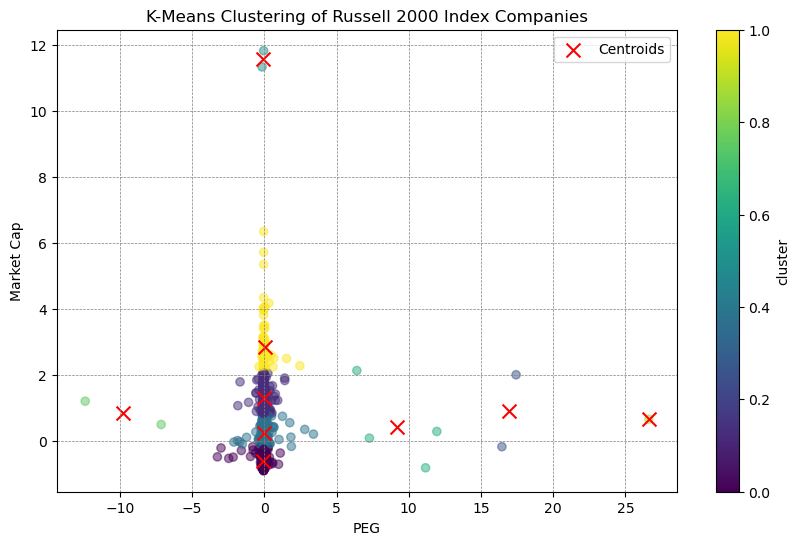

In [264]:
plt.figure(figsize=(10, 6))
plt.scatter(df_MC_PEG['BEst PEG Ratio:Y\n'], df_MC_PEG['Market Cap LF\n'], c=df_MC_PEG['cluster'], cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')  # Red X markers for centroids
plt.xlabel('PEG')
plt.ylabel('Market Cap')
plt.title('K-Means Clustering of Russell 2000 Index Companies')
plt.colorbar(label='cluster')
plt.legend()
plt.grid(which='both', color='gray', linestyle='--', linewidth=0.5)
plt.show()


In [291]:
# Building the morningstar rating and comparing
# build the Fund Investment Style axis
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

growth_score = (0.5*df['BEst Est LTG EPS\n']+
                0.125*df['Basic EPS - 5 Year Average Growth LF\n']+
                0.125*df['Rev Gr Adj 5Y CAGR LF\n']+
                0.125*df['CF/Sh - 5 Yr Geo Gr LF\n']+
                0.125*df['BV - 5 Yr Geo Gr LF\n']
               )

value_score =  (0.5*df['BEst P/E BF12M\n']+
                0.125*df['P/B 5Yr Avg LF\n']+
                0.125*df['P/S 5Yr Avg LF\n']+
                0.125*df['P/CF 5Yr Avg LF\n']+
                0.125*df['Dvd Ind Yld\n']
               )
growth_score_scaled = 100*scaler.fit_transform(growth_score.values.reshape(-1, 1))

value_score_scaled = 100*scaler.fit_transform(value_score.values.reshape(-1, 1))
df_MS = df.copy()
df_MS['Fund_Investment_Style'] = growth_score_scaled - value_score_scaled                                            

In [293]:
df_MS.describe()

,Weight,Shares,Price,BEst PEG Ratio:Y\n,Market Cap LF\n,P/B 5Yr Avg LF\n,P/S 5Yr Avg LF\n,Rev Gr Adj 5Y CAGR LF\n,P/CF 5Yr Avg LF\n,BV - 5 Yr Geo Gr LF\n,CF/Sh - 5 Yr Geo Gr LF\n,Basic EPS - 5 Year Average Growth LF\n,BEst Est LTG EPS\n,Dvd Ind Yld\n,BEst P/E BF12M\n,Fund_Investment_Style
count,0.0,0.0,1972.000000,1972.000000,1.972000e+03,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000
mean,NaN,NaN,34.325246,1.939595,1.543174e+09,3.222878,31.739085,9.643783,16.074598,4.997912,6.666194,15.527574,4.405968,3.141757,28.364633,30.169544
std,NaN,NaN,48.733793,9.926148,1.686400e+09,8.415778,559.860516,28.025908,108.350624,18.171221,16.890159,149.869552,14.515570,5.061731,163.194413,4.488778
min,NaN,NaN,0.115500,-121.067371,1.811160e+07,0.279001,0.028581,-100.000000,0.174408,-100.000000,-100.000000,-2017.131592,-117.420000,0.047020,1.580411,-69.560554
25%,NaN,NaN,7.995000,1.501337,3.915286e+08,1.213331,0.922655,4.324611,8.164119,1.734294,5.339077,11.328490,0.000000,2.786486,12.236441,29.867784
50%,NaN,NaN,18.305000,1.501337,9.217634e+08,1.799058,1.667241,6.413981,9.402755,4.885082,5.339077,11.328490,0.000000,2.786486,14.951520,30.173582
75%,NaN,NaN,40.077500,1.501337,2.136014e+09,2.829447,2.735392,8.806523,10.944803,8.094413,5.339077,11.328490,0.000000,2.786486,18.423157,30.790642
max,NaN,NaN,778.280000,266.081895,2.145804e+10,265.950867,23254.423828,427.076691,4598.741699,334.566162,215.143387,4677.399902,183.010000,212.201599,4966.027842,99.806284


In [267]:
df_MS['Market Cap LF\n'] = np.log(df_MS['Market Cap LF\n'])

(-100.0, 100.0)

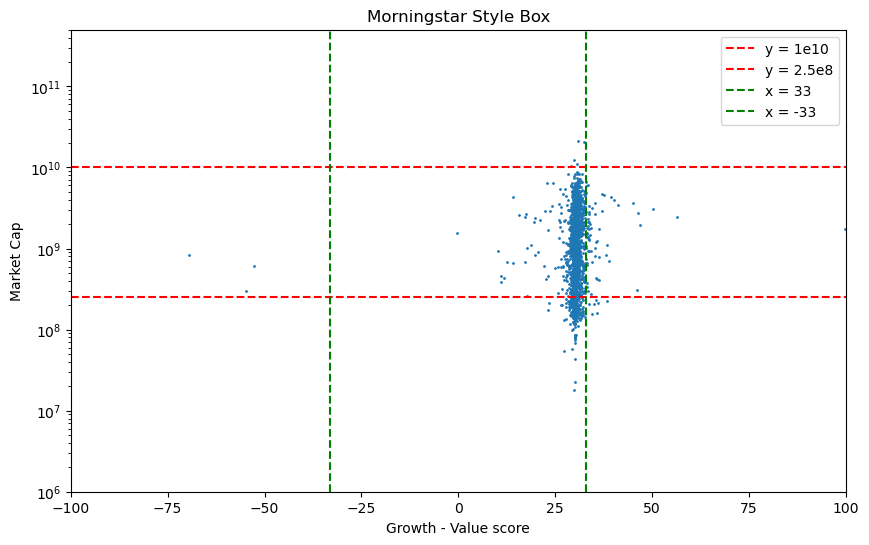

In [315]:
plt.figure(figsize=(10,6))
plt.scatter(df_MS['Fund_Investment_Style'], df_MS['Market Cap LF\n'], s=1)
plt.yscale('log')
plt.axhline(y=1e10, color='r', linestyle='--', label='y = 1e10')
plt.axhline(y=2.5e8, color='r', linestyle='--', label='y = 2.5e8')
plt.axvline(x=33, color='g', linestyle='--', label='x = 33')
plt.axvline(x=-33, color='g', linestyle='--', label='x = -33')
plt.title('Morningstar Style Box')
plt.xlabel('Growth - Value score')
plt.ylabel('Market Cap')
plt.legend()
plt.ylim(1e6,5e11)
plt.xlim(-100,100)

(-25.0, 75.0)

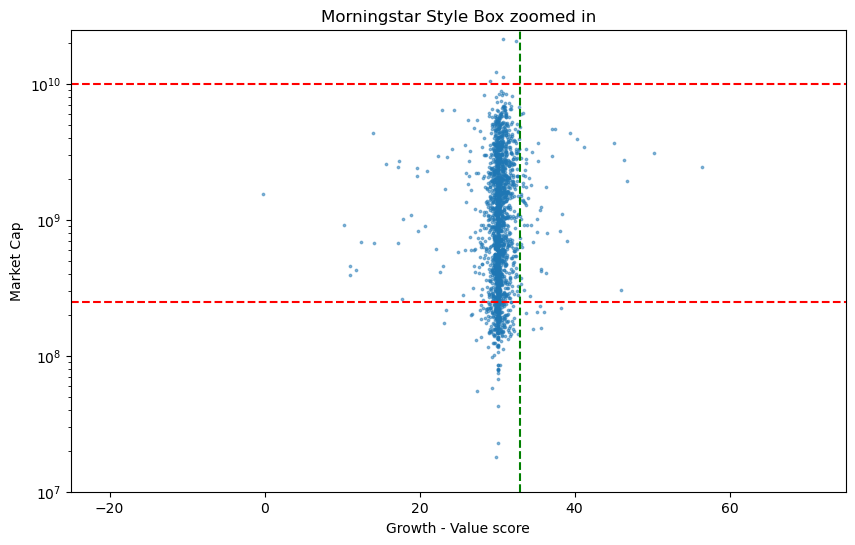

In [316]:
plt.figure(figsize=(10,6))
plt.scatter(df_MS['Fund_Investment_Style'], df_MS['Market Cap LF\n'], s=3,alpha=0.5)
plt.yscale('log')
plt.axhline(y=1e10, color='r', linestyle='--', label='y = 1e10')
plt.axhline(y=2.5e8, color='r', linestyle='--', label='y = 2.5e8')
plt.axvline(x=33, color='g', linestyle='--', label='x = 33')
plt.axvline(x=-33, color='g', linestyle='--', label='x = -33')
plt.title('Morningstar Style Box zoomed in')
plt.xlabel('Growth - Value score')
plt.ylabel('Market Cap')
plt.ylim(1e7,2.5e10)
plt.xlim(-25,75)

In [269]:
df_MS.describe()

,Weight,Shares,Price,BEst PEG Ratio:Y\n,Market Cap LF\n,P/B 5Yr Avg LF\n,P/S 5Yr Avg LF\n,Rev Gr Adj 5Y CAGR LF\n,P/CF 5Yr Avg LF\n,BV - 5 Yr Geo Gr LF\n,CF/Sh - 5 Yr Geo Gr LF\n,Basic EPS - 5 Year Average Growth LF\n,BEst Est LTG EPS\n,Dvd Ind Yld\n,BEst P/E BF12M\n,Fund_Investment_Style
count,0.0,0.0,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000
mean,NaN,NaN,34.325246,1.939595,20.633805,3.222878,31.739085,9.643783,16.074598,4.997912,6.666194,15.527574,4.405968,3.141757,28.364633,30.169544
std,NaN,NaN,48.733793,9.926148,1.066930,8.415778,559.860516,28.025908,108.350624,18.171221,16.890159,149.869552,14.515570,5.061731,163.194413,4.488778
min,NaN,NaN,0.115500,-121.067371,16.712063,0.279001,0.028581,-100.000000,0.174408,-100.000000,-100.000000,-2017.131592,-117.420000,0.047020,1.580411,-69.560554
25%,NaN,NaN,7.995000,1.501337,19.785568,1.213331,0.922655,4.324611,8.164119,1.734294,5.339077,11.328490,0.000000,2.786486,12.236441,29.867784
50%,NaN,NaN,18.305000,1.501337,20.641799,1.799058,1.667241,6.413981,9.402755,4.885082,5.339077,11.328490,0.000000,2.786486,14.951520,30.173582
75%,NaN,NaN,40.077500,1.501337,21.482207,2.829447,2.735392,8.806523,10.944803,8.094413,5.339077,11.328490,0.000000,2.786486,18.423157,30.790642
max,NaN,NaN,778.280000,266.081895,23.789365,265.950867,23254.423828,427.076691,4598.741699,334.566162,215.143387,4677.399902,183.010000,212.201599,4966.027842,99.806284


In [250]:
df.head()

,Ticker,Name,Weight,Shares,Price,BEst PEG Ratio:Y\n,Market Cap LF\n,P/B 5Yr Avg LF\n,P/S 5Yr Avg LF\n,Rev Gr Adj 5Y CAGR LF\n,P/CF 5Yr Avg LF\n,BV - 5 Yr Geo Gr LF\n,CF/Sh - 5 Yr Geo Gr LF\n,Basic EPS - 5 Year Average Growth LF\n,BEst Est LTG EPS\n,Dvd Ind Yld\n,BEst P/E BF12M\n,Fund_Investment_Style
0,TGTX UR Equity,TG Therapeutics Inc,NaN,NaN,23.480,1.219984,21.736491,29.274418,35.469791,354.214050,9.402755,51.980770,5.339077,11.328490,183.01,2.786486,33.822326,46.343502
1,AXNX UW Equity,Axonics Inc,NaN,NaN,70.140,3.109805,21.955741,4.959128,8.200708,138.390976,9.402755,25.707512,5.339077,11.328490,175.53,2.786486,109.804860,41.215963
2,WGS UW Equity,GeneDx Holdings Corp,NaN,NaN,60.250,1.501337,20.372084,1.196106,0.803663,6.413981,9.402755,4.885082,5.339077,11.328490,148.00,2.786486,14.951520,38.981066
3,ULCC UW Equity,Frontier Group Holdings Inc,NaN,NaN,6.985,1.501337,20.824599,2.805808,0.402562,8.841541,9.402755,4.885082,5.339077,54.347534,126.26,2.786486,15.980725,38.340862
4,RELY UW Equity,Remitly Global Inc,NaN,NaN,14.640,2.770410,22.020572,1.799058,1.667241,6.413981,9.402755,4.885082,5.339077,11.328490,98.00,2.786486,59.219034,35.241068


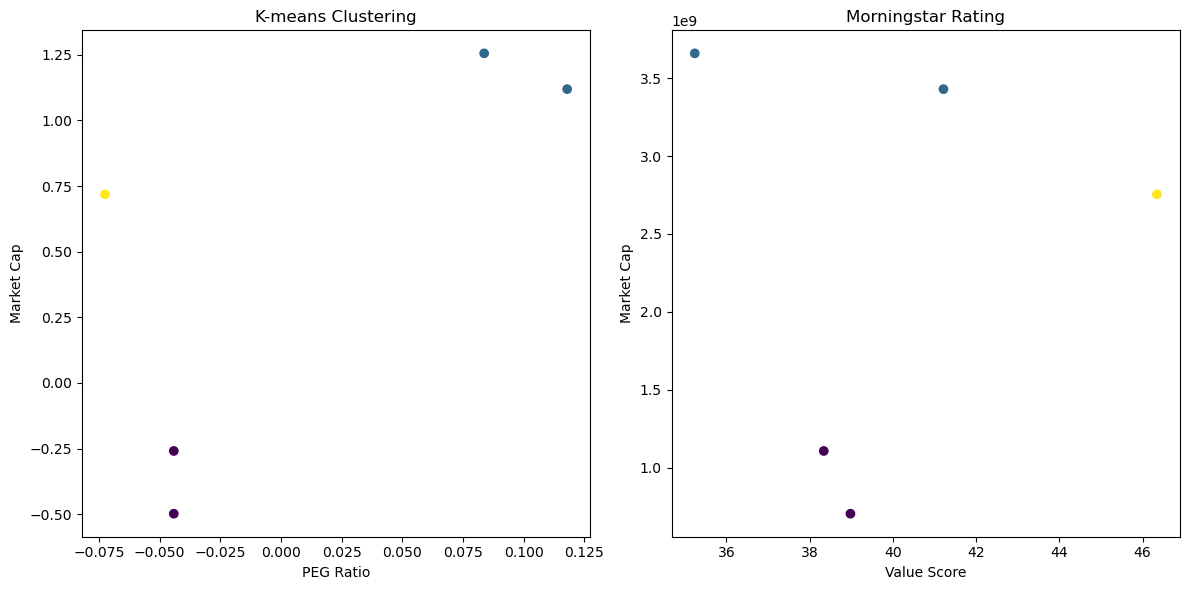

In [326]:
##compare positions of knn and morningstar rating for several companies:

##the companies to plot: TGTX, AXNX, WGS, ULCC, RELY
#Compare Cluster positioning of K-means with that of Morningstar ratings
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(df_MC_PEG.iloc[:5]['BEst PEG Ratio:Y\n'], df_MC_PEG.iloc[:5]['Market Cap LF\n'], c=df_MC_PEG.iloc[:5]['cluster'], cmap='viridis')
ax1.set_xlabel('PEG Ratio')
ax1.set_ylabel('Market Cap')
ax1.set_title('K-means Clustering')

df_MS['cluster'] = df_MC_PEG['cluster']
ax2.scatter(df_MS.iloc[:5]['Fund_Investment_Style'], df_MS.iloc[:5]['Market Cap LF\n'], c=df_MS[:5]['cluster'], cmap='viridis')
ax2.set_xlabel('Value Score')
ax2.set_ylabel('Market Cap')
ax2.set_title('Morningstar Rating')

plt.tight_layout()
plt.show()

In [320]:
# KNN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

scaler = StandardScaler()

df_knn = df.copy()
df_knn['cluster'] = df_MC_PEG['cluster']
df_knn[['BEst PEG Ratio:Y\n','Market Cap LF\n']] = scaler.fit_transform(df_knn[['BEst PEG Ratio:Y\n','Market Cap LF\n']])


X = df_knn[['BEst PEG Ratio:Y\n','Market Cap LF\n']]
y = df_knn['cluster']

print(df)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.3, random_state=42)
print(len(X_train),len(X_test))
# Create and fit the kNN model
k_neighbors = 9  # You can adjust this value
knn = KNeighborsClassifier(n_neighbors=k_neighbors)
knn.fit(X_train, y_train)

#print(X_test.describe())
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Output the accuracy
print("Accuracy of kNN on test set:", accuracy)



# New data point for prediction (example)
new_data = np.array([[1.501337,1016973376.0]])#([[3.109805,2.754471e+09],[3.614406,3.429709e+09],[3.614406,7.038557e+08], [2.770410,1.106645e+09],[-0.329804,3.659426e+09]]) 
## Scale the new data



means = np.array([df['BEst PEG Ratio:Y\n'].mean(), df['Market Cap LF\n'].mean()]) 
stds = np.array([df['BEst PEG Ratio:Y\n'].std(), df['Market Cap LF\n'].std()])     

standardized_arr = (new_data - means) / stds
print(new_data)
print(standardized_arr)
# Make prediction
predicted_cluster = knn.predict(standardized_arr)

# Output the predicted cluster
print("Predicted cluster:", predicted_cluster)

              Ticker                          Name  Weight  Shares   Price  \
0     TGTX UR Equity           TG Therapeutics Inc     NaN     NaN  23.480   
1     AXNX UW Equity                   Axonics Inc     NaN     NaN  70.140   
2      WGS UW Equity          GeneDx Holdings Corp     NaN     NaN  60.250   
3     ULCC UW Equity   Frontier Group Holdings Inc     NaN     NaN   6.985   
4     RELY UW Equity            Remitly Global Inc     NaN     NaN  14.640   
...              ...                           ...     ...     ...     ...   
1967  SSRM UW Equity                SSR Mining Inc     NaN     NaN   6.230   
1968   PBF UN Equity                PBF Energy Inc     NaN     NaN  32.490   
1969  BEAM UW Equity         Beam Therapeutics Inc     NaN     NaN  22.050   
1970  CATX UA Equity  Perspective Therapeutics Inc     NaN     NaN  11.960   
1971  FOLD UQ Equity       Amicus Therapeutics Inc     NaN     NaN  11.685   

      BEst PEG Ratio:Y\n  Market Cap LF\n  P/B 5Yr Avg LF\n  P/

C:\Users\ikego\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ikego\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim